<a href="https://colab.research.google.com/github/Luiz-01/AC2_RECONHECIMENTO-DE-PADROES/blob/main/Projeto_AC2_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pré Processamento de Dados

In [20]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import mean_squared_error



# Leitura dos dados do Dataset NFL
df_dataset = pd.read_csv('NFL QB Stats.csv', sep=',', index_col=None)

df_dataset.shape


(3177, 17)

Uma primeira impressão sobre os dados e os descritores estatísticos:

In [21]:
display(df_dataset.head(n=5))
display(df_dataset.describe())

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2,272,42.0,73,13,67,26,188
1,2022,Justin Herbert,4739,6.8,699,477,68.2,25,10,93.2,228,32.6,50,7,55,38,206
2,2022,Tom Brady,4694,6.4,733,490,66.8,25,9,90.7,237,32.3,50,8,63,22,160
3,2022,Kirk Cousins,4547,7.1,643,424,65.9,29,14,92.5,230,35.8,47,10,66,46,329
4,2022,Joe Burrow,4475,7.4,606,414,68.3,35,12,100.8,219,36.1,53,10,60,41,259


,Year,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
count,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000
mean,1996.540132,1704.224740,6.785615,245.350331,143.792572,56.746396,10.232295,8.340573,74.127856,75.975134,28.698709,18.350960,3.282971,56.800441,18.104501,126.402581
std,15.122372,1360.847951,1.794963,184.551518,115.432279,7.727250,9.546330,6.168180,20.282764,67.571655,10.481223,18.957776,3.817409,18.771205,13.648905,96.061336
min,1970.000000,37.000000,2.700000,2.000000,2.000000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000
25%,1984.000000,463.000000,6.000000,75.000000,40.000000,52.300000,2.000000,3.000000,62.300000,16.000000,25.400000,2.000000,0.000000,43.000000,6.000000,43.000000
50%,1997.000000,1371.000000,6.800000,211.000000,117.000000,57.100000,7.000000,7.000000,75.600000,55.000000,31.100000,11.000000,2.000000,57.000000,16.000000,110.000000
75%,2009.000000,2797.000000,7.400000,400.000000,233.000000,61.600000,16.000000,13.000000,86.700000,128.000000,35.000000,33.000000,6.000000,72.000000,28.000000,194.000000
max,2022.000000,5477.000000,57.500000,733.000000,490.000000,100.000000,55.000000,35.000000,158.300000,289.000000,100.000000,81.000000,20.000000,99.000000,76.000000,489.000000


A partir dos dados será que existe uma relação entre Maiores jardas ao longo do tempo, Jardas em um periodo especifico e a idade dos jogadores.

In [22]:
df_dataset[['Sck', 'SckY', 'Lng']].groupby(['Lng'], as_index=False).mean().sort_values(by='Lng', ascending=False)

,Lng,Sck,SckY
88,99,30.333333,207.555556
87,98,25.666667,156.833333
86,97,23.000000,144.000000
85,96,33.250000,213.750000
84,95,32.666667,235.111111
...,...,...,...
4,15,2.500000,17.500000
3,14,2.000000,20.000000
2,13,0.500000,0.500000
1,12,2.000000,15.000000


In [23]:
df_dataset[['20+', '40+', 'Lng']].groupby(['Lng'], as_index=False).mean().sort_values(by='Lng', ascending=False)

,Lng,20+,40+
88,99,45.111111,9.555556
87,98,32.333333,6.000000
86,97,46.000000,11.750000
85,96,22.500000,4.750000
84,95,34.555556,8.222222
...,...,...,...
4,15,0.000000,0.000000
3,14,0.000000,0.000000
2,13,0.000000,0.000000
1,12,0.000000,0.000000


O processo de análise das variáveis pode continuar, o que é chamado de análise exploratória.
Em seguida, observados quais atributos podem ser interessante, a primeira etapa é remover os atributos que julgar desnecessários:

In [24]:
df_removed = df_dataset.drop(columns=['Player','INT','Rate'])
df_removed.shape

df_dummy =  df_removed

Em seguida, começa a própria etapa de aprendizagem, com a divisão de dados e finalmente a avaliação do modelo:

In [25]:
display(df_dummy.head())

,Year,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,1st,1st%,20+,40+,Lng,Sck,SckY
0,2022,5250,8.1,648,435,67.1,41,272,42.0,73,13,67,26,188
1,2022,4739,6.8,699,477,68.2,25,228,32.6,50,7,55,38,206
2,2022,4694,6.4,733,490,66.8,25,237,32.3,50,8,63,22,160
3,2022,4547,7.1,643,424,65.9,29,230,35.8,47,10,66,46,329
4,2022,4475,7.4,606,414,68.3,35,219,36.1,53,10,60,41,259


Análise Exploratória de Dados (EDA)

Separando a classe dos atributos

In [26]:
X_columns = df_dummy.columns.tolist()
X_columns.remove('Lng')

display(X_columns)

X = df_dummy[X_columns]
y = df_dummy.Lng

display(X.shape)
display(y.shape)

['Year',
 'Pass Yds',
 'Yds/Att',
 'Att',
 'Cmp',
 'Cmp %',
 'TD',
 '1st',
 '1st%',
 '20+',
 '40+',
 'Sck',
 'SckY']

(3177, 13)

(3177,)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2223, 13)
(954, 13)
(2223,)
(954,)


Utilizando os vizinhos próximos a partir do Scikit-Learn:

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
y_pred = knn.predict(X_test)

In [30]:
y_pred

array([90, 51, 64, 77, 78, 42, 69, 45, 64, 70, 75, 67, 85, 73, 38, 61, 52,
       38, 42, 74, 69, 50, 54, 26, 40, 87, 78, 57, 79, 80, 47, 57, 59, 44,
       36, 47, 32, 59, 49, 22, 48, 77, 46, 27, 44, 69, 20, 64, 34, 57, 64,
       60, 64, 63, 57, 78, 48, 75, 88, 35, 64, 49, 55, 76, 50, 40, 74, 65,
       48, 50, 70, 54, 51, 67, 50, 60, 84, 63, 76, 61, 80, 45, 57, 43, 48,
       38, 46, 68, 20, 43, 63, 83, 59, 44, 52, 49, 60, 57, 81, 35, 73, 55,
       37, 91, 83, 82, 62, 64, 46, 77, 54, 83, 46, 67, 70, 62, 53, 70, 84,
       29, 94, 68, 77, 32, 34, 55, 59, 68, 52, 49, 22, 65, 48, 20, 47, 42,
       80, 49, 91, 63, 42, 70, 78, 73, 78, 50, 44, 13, 53, 83, 89, 44,  9,
       13, 62, 46, 80, 55, 45, 54, 32, 46, 52, 72, 50, 47, 75, 56, 67, 63,
       76, 50, 63, 74, 78, 40, 41, 42, 61, 67, 53, 50, 28, 47, 52, 68, 54,
       70, 75, 49, 29, 67, 65, 48, 66, 65, 75, 46, 75, 80, 80, 50, 89, 52,
       80, 72, 48, 63, 48, 66, 33, 51, 57, 73, 39, 29, 37, 71, 55, 53, 45,
       43, 81, 43, 50, 70

# Dividir os dados em conjuntos de treinamento e teste

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

Modelos de Classificação

Regressão Linear

Epoch 1/16
70/70 [==============================] - 1s 4ms/step - loss: 53.6298 - val_loss: 49.3885
Epoch 2/16
70/70 [==============================] - 0s 3ms/step - loss: 46.5968 - val_loss: 42.5308
Epoch 3/16
70/70 [==============================] - 0s 3ms/step - loss: 39.7263 - val_loss: 35.6146
Epoch 4/16
70/70 [==============================] - 0s 3ms/step - loss: 32.6690 - val_loss: 28.7199
Epoch 5/16
70/70 [==============================] - 0s 3ms/step - loss: 25.8015 - val_loss: 22.0892
Epoch 6/16
70/70 [==============================] - 0s 3ms/step - loss: 19.6382 - val_loss: 16.8433
Epoch 7/16
70/70 [==============================] - 0s 3ms/step - loss: 15.1907 - val_loss: 13.4571
Epoch 8/16
70/70 [==============================] - 0s 3ms/step - loss: 12.6017 - val_loss: 11.6368
Epoch 9/16
70/70 [==============================] - 0s 6ms/step - loss: 11.4210 - val_loss: 10.7835
Epoch 10/16
70/70 [==============================] - 0s 6ms/step - loss: 10.8613 - val_loss: 10.4672

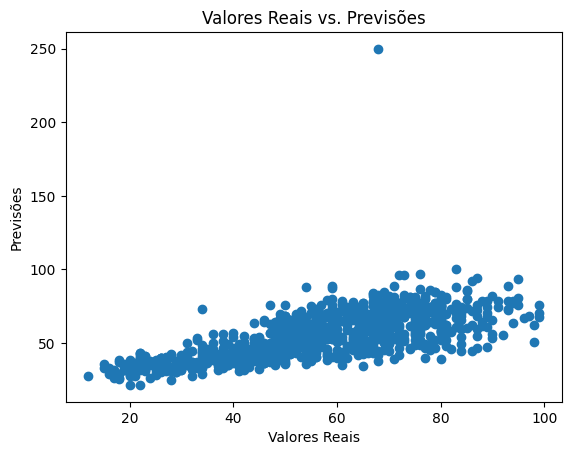

In [35]:
# Escolha um modelo e treine-o
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

# Faça previsões
history = model.fit(X_train, y_train,epochs=16, validation_data=(X_test, y_test))

# Avalie o modelo
y_pred = model.predict(X_test)
print("MSE: " , mean_squared_error(y_test, y_pred))
print("R2: " , r2_score(y_test, y_pred))

# Visualize os resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.show()

Arvore de Decissão

In [33]:
# Treinar o modelo de árvore de decisão


Redes Neurais

In [34]:
# Treinar o modelo de rede neural
